In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [43]:
#--- Load and Preprocess the MNIST Dataset ---

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Add channel dimension
X_train = np.expand_dims(X_train, -1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)    # (10000, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [44]:
# --- Build the CNN Model ---
img_size = (28, 28, 1)
num_classes = 10

inputs = Input(img_size)
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Show model summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,346 (2.26 MB)

 Trainable params: 592,346 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# --- Compile the Model ---

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [46]:
# --- Train the Model ---

# Set training parameters
batch_size = 64
epochs = 10

# Train the model and store the training history
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8007 - loss: 0.5992 - val_accuracy: 0.9805 - val_loss: 0.0668
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9803 - loss: 0.0631 - val_accuracy: 0.9845 - val_loss: 0.0488
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9880 - loss: 0.0377 - val_accuracy: 0.9842 - val_loss: 0.0497
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9929 - loss: 0.0237 - val_accuracy: 0.9877 - val_loss: 0.0424
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9864 - val_loss: 0.0495
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9854 - val_loss: 0.0609
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9814 - val_loss: 0.0701
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9967 - loss: 0.0113 - val_accuracy: 0.

In [47]:
# --- Evaluate the Model and Show Accuracy ---

score = model.evaluate(X_test, y_test, verbose=0)
print("\n--- Model Evaluation ---")
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f} ({score[1]*100:.2f}%)")
print("------------------------\n")


--- Model Evaluation ---
Test loss: 0.0581
Test accuracy: 0.9869 (98.69%)
------------------------




--- Displaying Loss Curves ---


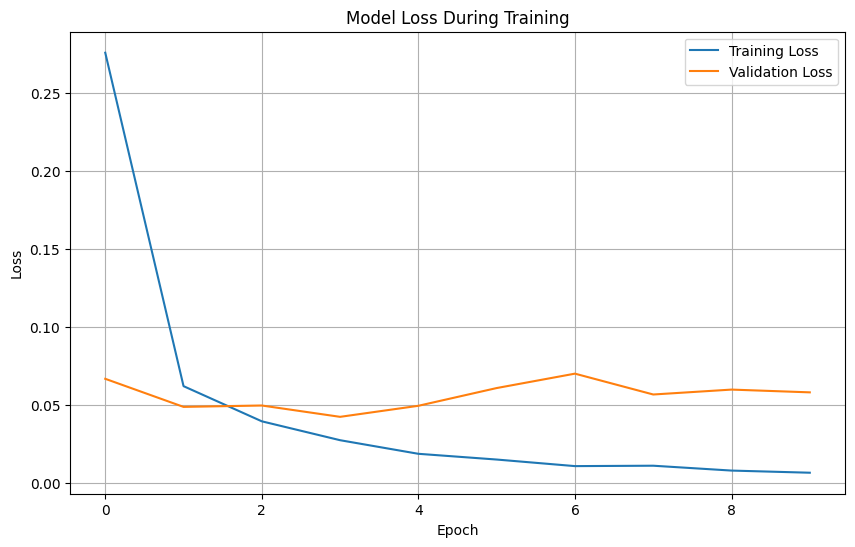

In [48]:
# 6. Plot the training and validation loss curves
print("\n--- Displaying Loss Curves ---")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


--- Visualizing Predictions vs. Real Images ---


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


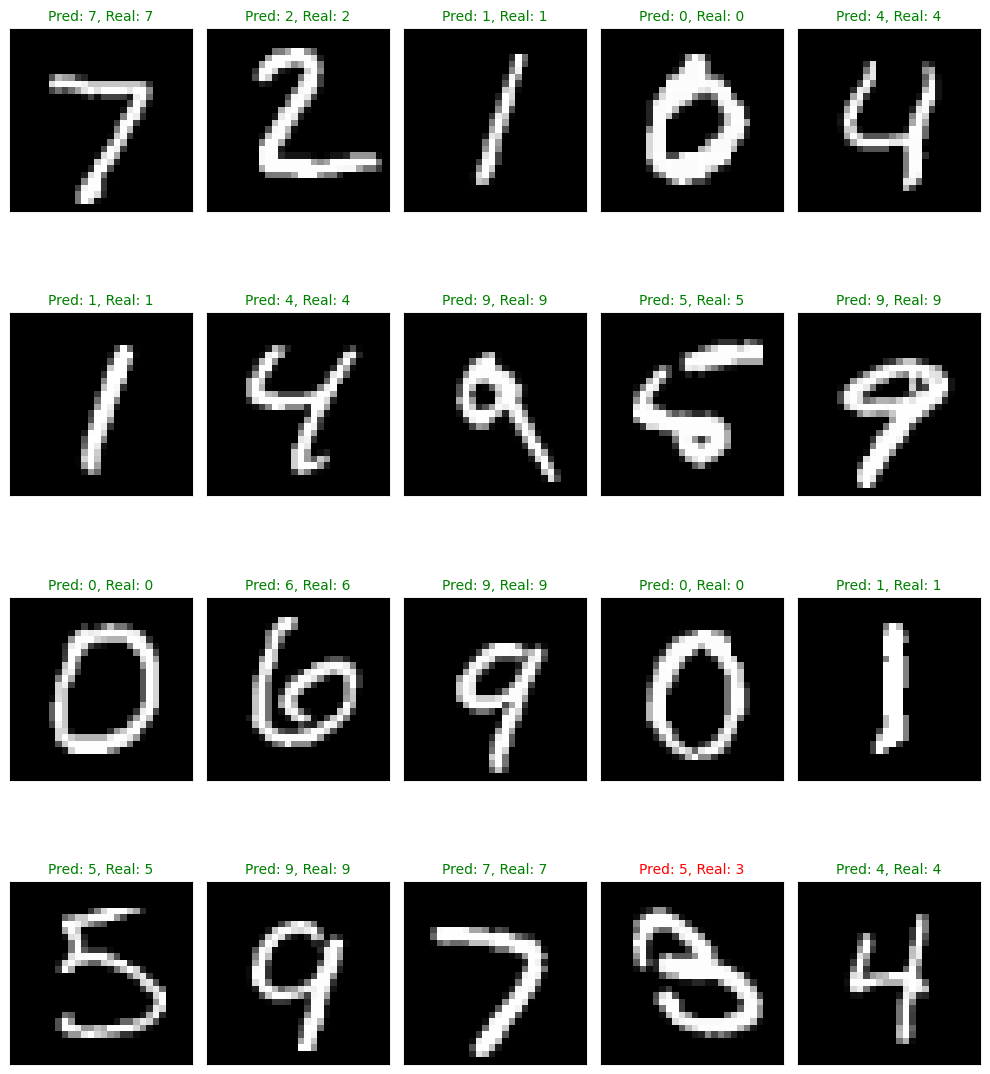

In [49]:
print("\n--- Visualizing Predictions vs. Real Images ---")

# Predict on first 20 test samples
y_pred_probs = model.predict(X_test[:20])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test[:20], axis=1)

plt.figure(figsize=(10, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_test[i].squeeze(), cmap="gray")

    # Title with color coding
    color = "green" if y_pred[i] == y_true[i] else "red"
    plt.title(f"Pred: {y_pred[i]}, Real: {y_true[i]}", fontsize=10, color=color)

    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()
